### Regression Project

In [1]:
import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Load environment variables from .env file into a dictionary
environment_variables=dotenv_values('.env')# Get the values for the credentials you set in the '.env' file
database=environment_variables.get("DATABASE")
server=environment_variables.get("SERVER")
username=environment_variables.get("USERNAME")
password=environment_variables.get("PASSWORD")

connection_string=f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [3]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection=pyodbc.connect(connection_string)

In [4]:
# Now the sql queries to get the data is what what you see below. 
# Note that you will not have permissions to insert delete or update this database table. 

query_1 = "Select * from dbo.oil"
query_2 = "Select * from dbo.holidays_events"
query_3 = "Select * from dbo.stores"

data_oil = pd.read_sql(query_1,connection)
holiday_data = pd.read_sql(query_2,connection)
store_data = pd.read_sql(query_3,connection)

In [5]:
# preview of first five rows of each dataframe using .head() method
#data_oil
data_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.139999
2,2013-01-03,92.970001
3,2013-01-04,93.120003
4,2013-01-07,93.199997


In [6]:
#Rename the 'dcoilwtico' to 'Oil_prices"
data_oil.rename(columns={'dcoilwtico': 'Oil_prices'}, inplace=True)

In [7]:
#Check for duplicates
data_oil.duplicated().sum()

0

In [8]:
#holiday_data
holiday_data.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [9]:
#Check for duplicates
holiday_data.duplicated().sum()

0

In [10]:
#store_data
store_data.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [11]:
#Check for duplicates
store_data.duplicated().sum()

0

In [12]:
#saving copy of files in  .csv format
data_oil.to_csv('oil_prices.csv')
holiday_data.to_csv('holiday_data.csv')
store_data.to_csv('store_data.csv')

In [13]:
#loading of datasets for review
oil_prices = pd.read_csv(r'C:\Users\WORLDAX COMPUTERS\Python Projects\LP3_DAP_Project\LP3-Regression-Project\Datasets\oil_prices.csv',parse_dates=['date'], index_col=0)
holiday_data = pd.read_csv(r'C:\Users\WORLDAX COMPUTERS\Python Projects\LP3_DAP_Project\LP3-Regression-Project\Datasets\holiday_data.csv',parse_dates=['date'], index_col=0)
store_nbr_data = pd.read_csv(r'C:\Users\WORLDAX COMPUTERS\Python Projects\LP3_DAP_Project\LP3-Regression-Project\Datasets\store_data.csv', index_col=0)


In [14]:
#preview of information summary in the dataframes using .info() method
#1.oil prices data
oil_prices.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   Oil_prices  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 28.5 KB


In [15]:
#Check of missing values in Holiday data
oil_prices.isna().sum()

date           0
Oil_prices    43
dtype: int64

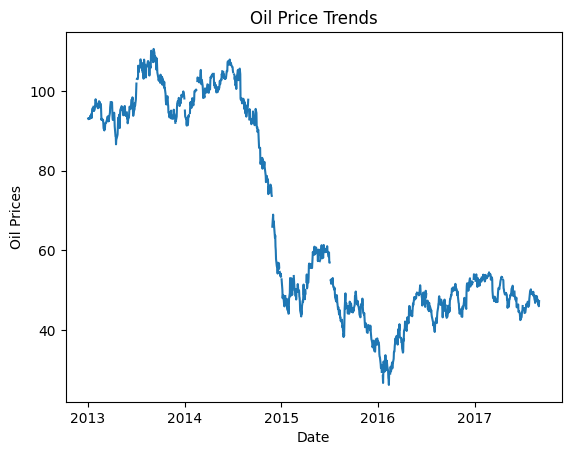

In [16]:
#Visual representation
#Broken regions on line represent missing values
plt.plot(oil_prices['date'], oil_prices['Oil_prices'])
plt.xlabel('Date')
plt.ylabel('Oil Prices')
plt.title('Oil Price Trends')
plt.show()

In [17]:
#2.Holiday_data 
holiday_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 16.7+ KB


In [18]:
holiday_data['type'].unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [19]:
#Check of missing values in Holiday data
holiday_data.isna().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [20]:
# Grouping by 'type' and counting occurrences of each 'locale'
locale_counts = holiday_data.groupby('type')['locale'].count()
locale_counts

type
Additional     51
Bridge          5
Event          56
Holiday       221
Transfer       12
Work Day        5
Name: locale, dtype: int64

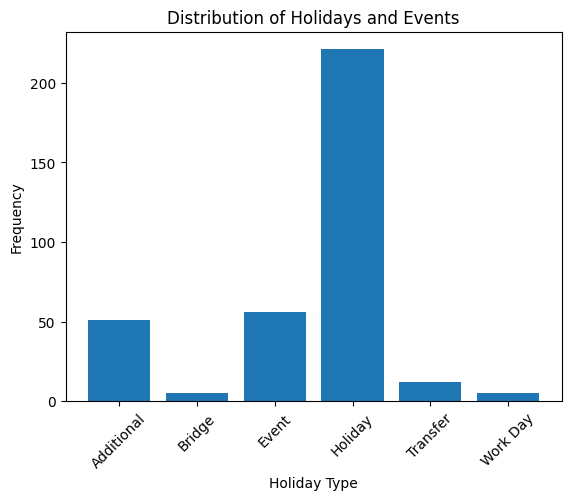

In [21]:
# Creating a bar plot
plt.bar(locale_counts.index, locale_counts.values)
plt.xlabel('Holiday Type')
plt.ylabel('Frequency')
plt.title('Distribution of Holidays and Events')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [22]:
# 3. Stores data
store_nbr_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.5+ KB


In [23]:
#Check of missing values in store_data
store_nbr_data.isna().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

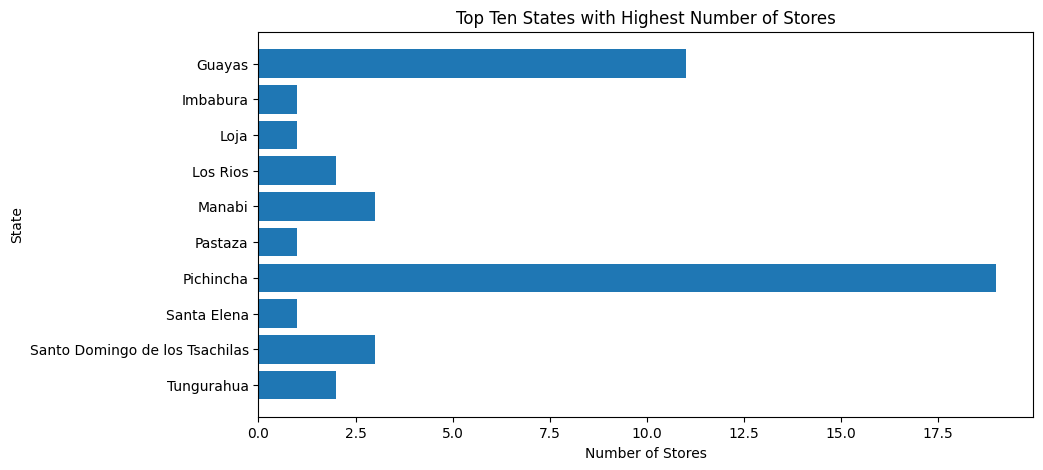

In [24]:
# Grouping by state and counting the number of stores
state_counts = store_nbr_data.groupby('state')['store_nbr'].count()

grouped_state_counts = state_counts.sort_index(ascending=False)

# Selecting the top ten states
top_ten_states = grouped_state_counts.head(10)

# Creating a horizontal bar plot for top ten states
plt.figure(figsize=(10, 5))
plt.barh(top_ten_states.index, top_ten_states.values)
plt.ylabel('State')
plt.xlabel('Number of Stores')
plt.title('Top Ten States with Highest Number of Stores')
plt.show()

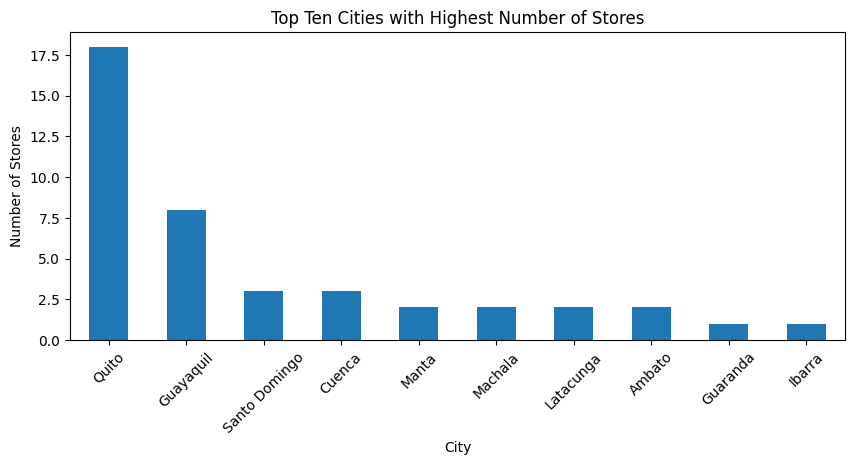

In [25]:
# Grouping by city and counting the number of stores
store_grouping = store_nbr_data.groupby('city')['store_nbr'].count()
store_grouping_sorted = store_grouping.sort_values(ascending=False)

# Selecting the top ten cities
top_ten_cities = store_grouping_sorted.head(10)

# Creating a bar plot for the top ten cities
plt.figure(figsize=(10, 4))
top_ten_cities.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Number of Stores')
plt.title('Top Ten Cities with Highest Number of Stores')
plt.xticks(rotation=45)
plt.show()

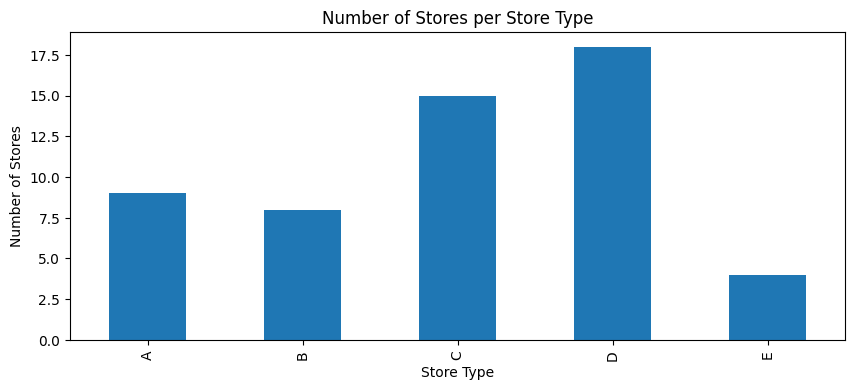

In [26]:
# Creating a bar plot of store count per type
plt.figure(figsize=(10, 4))
store_nbr_data['type'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Store Type')
plt.ylabel('Number of Stores')
plt.title('Number of Stores per Store Type')
#plt.xticks(rotation=45)
plt.show()

In [27]:
#transaction data
transaction_data = pd.read_csv(r"C:\Users\WORLDAX COMPUTERS\Python Projects\LP3_DAP_Project\LP3-Regression-Project\Datasets\transactions.csv", parse_dates=['date'], index_col='date')
#preview of information summary
transaction_data.info()                          

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 83488 entries, 2013-01-01 to 2017-08-15
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   store_nbr     83488 non-null  int64
 1   transactions  83488 non-null  int64
dtypes: int64(2)
memory usage: 1.9 MB


In [28]:
#Any missing values in the transaction_data dataframe
transaction_data.isna().sum()

store_nbr       0
transactions    0
dtype: int64

In [29]:
# Grouping by store_nbr and summing the transactions
transactions_grouped = transaction_data.groupby('store_nbr')['transactions'].sum()
# Series contains the sum of transactions for each store number. 
# Sorting the results in descending order based on the sum of transactions
transactions_sorted = transactions_grouped.sort_values(ascending=False)
#Top ten stores with highest transactions
top_ten_stores = transactions_sorted.head(10)
#Creation of a dataframe table to ease visualization/understanding
top_ten_stores_per_transactions = top_ten_stores.reset_index()
top_ten_stores_per_transactions

,store_nbr,transactions
0,44,7273093
1,47,6535810
2,45,6201115
3,46,5990113
4,3,5366350
5,48,5107785
6,8,4637971
7,49,4574103
8,50,4384444
9,11,3972488


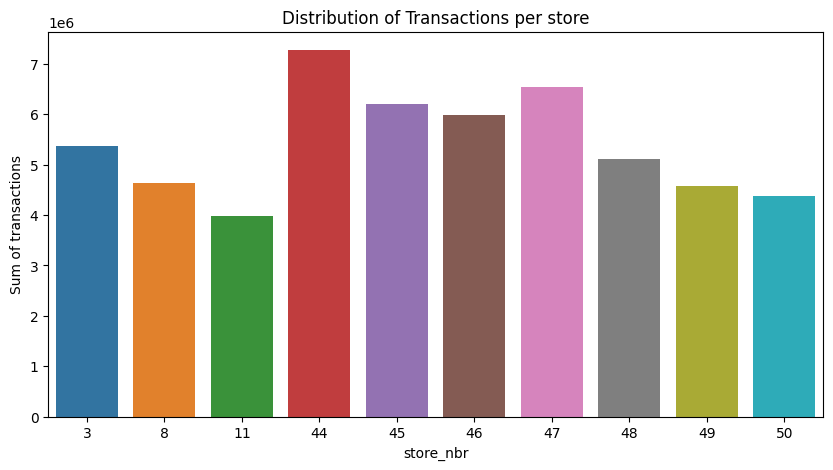

In [30]:
plt.figure(figsize=(10,5))
plt.xlabel('store number')
plt.ylabel('Sum of transactions')
plt.title('Distribution of Transactions per store')
sns.barplot(x=top_ten_stores.index, y=top_ten_stores.values)
plt.show()

In [31]:
#Loading of Train data set
train_data = pd.read_csv(r"C:\Users\WORLDAX COMPUTERS\Python Projects\LP3_DAP_Project\LP3-Regression-Project\Datasets\train.csv", parse_dates=['date'], index_col='date')
#Preview of first five rows
train_data.head()

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0
2013-01-01,1,1,BABY CARE,0.0,0
2013-01-01,2,1,BEAUTY,0.0,0
2013-01-01,3,1,BEVERAGES,0.0,0
2013-01-01,4,1,BOOKS,0.0,0


In [32]:
train_data.columns

Index(['id', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

In [33]:
#Preview of information summary in train data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3000888 entries, 2013-01-01 to 2017-08-15
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [34]:
#Check of missing values in train data
train_data.isna().sum()

id             0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [35]:
#Check of Duplicates
train_data.duplicated().sum()

0

In [36]:
#Loading of test data set
test_data = pd.read_csv(r"C:\Users\WORLDAX COMPUTERS\Python Projects\LP3_DAP_Project\LP3-Regression-Project\Datasets\test.csv", parse_dates=['date'], index_col='date')
#Preview of first five rows
test_data.head() 

,id,store_nbr,family,onpromotion
date,,,,
2017-08-16,3000888,1,AUTOMOTIVE,0
2017-08-16,3000889,1,BABY CARE,0
2017-08-16,3000890,1,BEAUTY,2
2017-08-16,3000891,1,BEVERAGES,20
2017-08-16,3000892,1,BOOKS,0


In [37]:
#Preview of information summary in test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28512 entries, 2017-08-16 to 2017-08-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   store_nbr    28512 non-null  int64 
 2   family       28512 non-null  object
 3   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ MB


In [38]:
#Check of missing values in test data
test_data.isna().sum()

id             0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In [39]:
#Check of Duplicates
test_data.duplicated().sum()

0

## Cleaning

Ecuador is an oil-dependent country and its economical health is highly vulnerable to shocks in oil prices

Slice of data from Date 2013-01-01 to 2013-01-07 in oil.csv(Daily oil price) 

Addition of the sliced oil prices data to the training set because they fall within same timeframe



In [40]:
start_date = pd.to_datetime('2013-01-01')

end_date = pd.to_datetime('2017-08-15')

#Use of Boolean indexing to slice data within the data range
sliced_df1 =oil_prices[(oil_prices['date'] >= start_date) & (oil_prices['date'] <= end_date)]

sliced_df1

,date,Oil_prices
0,2013-01-01,NaN
1,2013-01-02,93.139999
2,2013-01-03,92.970001
3,2013-01-04,93.120003
4,2013-01-07,93.199997
...,...,...
1201,2017-08-09,49.590000
1202,2017-08-10,48.540001
1203,2017-08-11,48.810001
1204,2017-08-14,47.590000


Concatanation of sliced_df_1 to the training data set

In [41]:
# Merge the two DataFrames based on the 'date' column
#The how='left' argument specifies that you want to keep all rows from the left DataFrame (train_data), 
#and match them with rows from the right DataFrame (sliced_df1) based on the 'date' column.

merged_train_data = train_data.merge(sliced_df1, on='date', how='left')

#preview of merged train data
merged_train_data.tail(10)

,date,id,store_nbr,family,sales,onpromotion,Oil_prices
3000878,2017-08-15,3000878,9,MAGAZINES,11.000,0,47.57
3000879,2017-08-15,3000879,9,MEATS,449.228,0,47.57
3000880,2017-08-15,3000880,9,PERSONAL CARE,522.000,11,47.57
3000881,2017-08-15,3000881,9,PET SUPPLIES,6.000,0,47.57
3000882,2017-08-15,3000882,9,PLAYERS AND ELECTRONICS,6.000,0,47.57
3000883,2017-08-15,3000883,9,POULTRY,438.133,0,47.57
3000884,2017-08-15,3000884,9,PREPARED FOODS,154.553,1,47.57
3000885,2017-08-15,3000885,9,PRODUCE,2419.729,148,47.57
3000886,2017-08-15,3000886,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57
3000887,2017-08-15,3000887,9,SEAFOOD,16.000,0,47.57


Addition of store.csv medata and transaction data to both the training and testing data

Merging will be based on the similar column in the dataframes

Merging of store.csv with train_data based on column 'store number'

In [42]:
#Check of unique values in store number column of merged_train_data
merged_train_data['store_nbr'].unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9], dtype=int64)

In [43]:
# check of  unique values in store number column of store dataframe
store_data['store_nbr'].unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54], dtype=int64)

In [44]:
# Merge the two DataFrames based on the 'store number' column
merged_train_data2 = merged_train_data.merge(store_data, on='store_nbr', how='left')

#preview of the merged train data
merged_train_data2.tail(10)

,date,id,store_nbr,family,sales,onpromotion,Oil_prices,city,state,type,cluster
3000878,2017-08-15,3000878,9,MAGAZINES,11.000,0,47.57,Quito,Pichincha,B,6
3000879,2017-08-15,3000879,9,MEATS,449.228,0,47.57,Quito,Pichincha,B,6
3000880,2017-08-15,3000880,9,PERSONAL CARE,522.000,11,47.57,Quito,Pichincha,B,6
3000881,2017-08-15,3000881,9,PET SUPPLIES,6.000,0,47.57,Quito,Pichincha,B,6
3000882,2017-08-15,3000882,9,PLAYERS AND ELECTRONICS,6.000,0,47.57,Quito,Pichincha,B,6
3000883,2017-08-15,3000883,9,POULTRY,438.133,0,47.57,Quito,Pichincha,B,6
3000884,2017-08-15,3000884,9,PREPARED FOODS,154.553,1,47.57,Quito,Pichincha,B,6
3000885,2017-08-15,3000885,9,PRODUCE,2419.729,148,47.57,Quito,Pichincha,B,6
3000886,2017-08-15,3000886,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Quito,Pichincha,B,6
3000887,2017-08-15,3000887,9,SEAFOOD,16.000,0,47.57,Quito,Pichincha,B,6


Merging of transaction data to the training set based on two similar columns, namely, 'date', and 'store_nbr'

In [45]:
merged_train_dataset3 = merged_train_data2.merge(transaction_data, on=['date', 'store_nbr'], how='left')

#Preview of changes made to training data
merged_train_dataset3.head(5)

,date,id,store_nbr,family,sales,onpromotion,Oil_prices,city,state,type,cluster,transactions
0,2013-01-01,0,1,AUTOMOTIVE,0.0,0,NaN,Quito,Pichincha,D,13,NaN
1,2013-01-01,1,1,BABY CARE,0.0,0,NaN,Quito,Pichincha,D,13,NaN
2,2013-01-01,2,1,BEAUTY,0.0,0,NaN,Quito,Pichincha,D,13,NaN
3,2013-01-01,3,1,BEVERAGES,0.0,0,NaN,Quito,Pichincha,D,13,NaN
4,2013-01-01,4,1,BOOKS,0.0,0,NaN,Quito,Pichincha,D,13,NaN


Merging "Holiday Data" to the "merged_train_dataset" on similar column, "date"

In [46]:
holiday_data

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [47]:
#Choose of date range in 'holiday_data' column that falls within the train data set 

start_date1 = pd.to_datetime('2013-01-01')

end_date1 = pd.to_datetime('2017-08-15')

#Use of Boolean indexing to slice data within the data range
holiday_data_range =holiday_data[(holiday_data['date'] >= start_date1) & (holiday_data['date'] <= end_date1)]

In [48]:
merged_train_dataset4 = merged_train_dataset3.merge(holiday_data_range, on='date', how='left')

#Preview of new changes made to training data
merged_train_dataset4.head(5)

,date,id,store_nbr,family,sales,onpromotion,Oil_prices,city,state,type_x,cluster,transactions,type_y,locale,locale_name,description,transferred
0,2013-01-01,0,1,AUTOMOTIVE,0.0,0,NaN,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,2013-01-01,1,1,BABY CARE,0.0,0,NaN,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,2013-01-01,2,1,BEAUTY,0.0,0,NaN,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,2013-01-01,3,1,BEVERAGES,0.0,0,NaN,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,2013-01-01,4,1,BOOKS,0.0,0,NaN,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False


In [49]:
#A look of unique values in "type_y" column
merged_train_dataset4['type_y'].unique()

array(['Holiday', nan, 'Work Day', 'Additional', 'Event', 'Transfer',
       'Bridge'], dtype=object)

In [50]:
#A look of unique values in "type_x" column
merged_train_dataset4['type_x'].unique()

array(['D', 'C', 'B', 'E', 'A'], dtype=object)

Dropping of unnecessary columns(features) that don't have any contribution to the sales, the target

In [51]:
merged_train_dataset = merged_train_dataset4.drop(columns=['type_x', 'cluster', 'locale', 'locale_name', 'description', 'transferred'], axis=1,)
#Preview of changes
merged_train_dataset.columns

Index(['date', 'id', 'store_nbr', 'family', 'sales', 'onpromotion',
       'Oil_prices', 'city', 'state', 'transactions', 'type_y'],
      dtype='object')

In [52]:
#Renaming of 'type_y' column to 'holiday_types' for easy understanding

merged_train_dataset = merged_train_dataset.rename(columns={'type_y': 'holiday_types'})
#Preview of changes 
merged_train_dataset.columns

Index(['date', 'id', 'store_nbr', 'family', 'sales', 'onpromotion',
       'Oil_prices', 'city', 'state', 'transactions', 'holiday_types'],
      dtype='object')

Creation of new column features from 'date' column, namely, 'day', 'Month', and 'year' in train dataset

In [53]:
#Creation of new "year" column
merged_train_dataset['year'] = merged_train_dataset['date'].dt.year

#Creation of new "month" column
merged_train_dataset['month'] = merged_train_dataset['date'].dt.month

#Creation of new "day" column
merged_train_dataset['day'] = merged_train_dataset['date'].dt.day

In [54]:
#shape of the modified train dataset
merged_train_dataset.shape

(3054348, 14)

In [55]:
merged_train_dataset.duplicated().sum()

30294

In [56]:
#Drop of duplicates in train dataset
merged_train_dataset.drop_duplicates(keep=False, inplace=True)

In [57]:
#Check if all duplicates have been dropped
merged_train_dataset.duplicated().sum()

0

In [58]:
#Missing values in the modified train dataset
merged_train_dataset.isna().sum()

date                   0
id                     0
store_nbr              0
family                 0
sales                  0
onpromotion            0
Oil_prices        926640
city                   0
state                  0
transactions      245850
holiday_types    2551824
year                   0
month                  0
day                    0
dtype: int64

Similar changes will be made to the test dataset as were done to train set

Slice of data from Date 2017-08-16 to 2017-08-31 in oil.csv(Daily oil price) 

Addition of the sliced oil prices data to the test set because they fall within same timeframe

In [59]:
start_date1 = pd.to_datetime('2017-08-16')

end_date1 = pd.to_datetime('2017-08-31')

#Use of Boolean indexing to slice data within the data range
sliced_df2 =oil_prices[(oil_prices['date'] >= start_date1) & (oil_prices['date'] <= end_date1)]

#Preview of sliced data
sliced_df2

,date,Oil_prices
1206,2017-08-16,46.799999
1207,2017-08-17,47.070000
1208,2017-08-18,48.590000
1209,2017-08-21,47.389999
1210,2017-08-22,47.650002
1211,2017-08-23,48.450001
1212,2017-08-24,47.240002
1213,2017-08-25,47.650002
1214,2017-08-28,46.400002
1215,2017-08-29,46.459999


Concatanation of sliced_df2 to the test data set

In [60]:
# Merge the two DataFrames based on the 'date' column
merged_test_data = test_data.merge(sliced_df2, on='date', how='left')

#preview of merged train data
merged_test_data.tail(10)

,date,id,store_nbr,family,onpromotion,Oil_prices
28502,2017-08-31,3029390,9,MAGAZINES,0,47.259998
28503,2017-08-31,3029391,9,MEATS,20,47.259998
28504,2017-08-31,3029392,9,PERSONAL CARE,14,47.259998
28505,2017-08-31,3029393,9,PET SUPPLIES,0,47.259998
28506,2017-08-31,3029394,9,PLAYERS AND ELECTRONICS,0,47.259998
28507,2017-08-31,3029395,9,POULTRY,1,47.259998
28508,2017-08-31,3029396,9,PREPARED FOODS,0,47.259998
28509,2017-08-31,3029397,9,PRODUCE,1,47.259998
28510,2017-08-31,3029398,9,SCHOOL AND OFFICE SUPPLIES,9,47.259998
28511,2017-08-31,3029399,9,SEAFOOD,0,47.259998


In [61]:
# Merging of store.csv data with the test_data based on column 'store number'
# Merge the two DataFrames based on the 'store number' column
merged_test_data2 = merged_test_data.merge(store_data, on='store_nbr', how='left')

#preview of the merged train data
merged_test_data2.tail(10)

,date,id,store_nbr,family,onpromotion,Oil_prices,city,state,type,cluster
28502,2017-08-31,3029390,9,MAGAZINES,0,47.259998,Quito,Pichincha,B,6
28503,2017-08-31,3029391,9,MEATS,20,47.259998,Quito,Pichincha,B,6
28504,2017-08-31,3029392,9,PERSONAL CARE,14,47.259998,Quito,Pichincha,B,6
28505,2017-08-31,3029393,9,PET SUPPLIES,0,47.259998,Quito,Pichincha,B,6
28506,2017-08-31,3029394,9,PLAYERS AND ELECTRONICS,0,47.259998,Quito,Pichincha,B,6
28507,2017-08-31,3029395,9,POULTRY,1,47.259998,Quito,Pichincha,B,6
28508,2017-08-31,3029396,9,PREPARED FOODS,0,47.259998,Quito,Pichincha,B,6
28509,2017-08-31,3029397,9,PRODUCE,1,47.259998,Quito,Pichincha,B,6
28510,2017-08-31,3029398,9,SCHOOL AND OFFICE SUPPLIES,9,47.259998,Quito,Pichincha,B,6
28511,2017-08-31,3029399,9,SEAFOOD,0,47.259998,Quito,Pichincha,B,6


In [62]:
# Merging of transaction data to the test set based on two similar columns, namely, 'date', and 'store_nbr'
merged_test_data3 = merged_test_data2.merge(transaction_data, on=['date', 'store_nbr'], how='left')

#Preview of changes made to training data
merged_test_data3.tail(10)

,date,id,store_nbr,family,onpromotion,Oil_prices,city,state,type,cluster,transactions
28502,2017-08-31,3029390,9,MAGAZINES,0,47.259998,Quito,Pichincha,B,6,NaN
28503,2017-08-31,3029391,9,MEATS,20,47.259998,Quito,Pichincha,B,6,NaN
28504,2017-08-31,3029392,9,PERSONAL CARE,14,47.259998,Quito,Pichincha,B,6,NaN
28505,2017-08-31,3029393,9,PET SUPPLIES,0,47.259998,Quito,Pichincha,B,6,NaN
28506,2017-08-31,3029394,9,PLAYERS AND ELECTRONICS,0,47.259998,Quito,Pichincha,B,6,NaN
28507,2017-08-31,3029395,9,POULTRY,1,47.259998,Quito,Pichincha,B,6,NaN
28508,2017-08-31,3029396,9,PREPARED FOODS,0,47.259998,Quito,Pichincha,B,6,NaN
28509,2017-08-31,3029397,9,PRODUCE,1,47.259998,Quito,Pichincha,B,6,NaN
28510,2017-08-31,3029398,9,SCHOOL AND OFFICE SUPPLIES,9,47.259998,Quito,Pichincha,B,6,NaN
28511,2017-08-31,3029399,9,SEAFOOD,0,47.259998,Quito,Pichincha,B,6,NaN


Merging "Holiday Data" to the "merged_test_dataset" on similar column, "date"

In [63]:
holiday_data

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [64]:
test_data

,id,store_nbr,family,onpromotion
date,,,,
2017-08-16,3000888,1,AUTOMOTIVE,0
2017-08-16,3000889,1,BABY CARE,0
2017-08-16,3000890,1,BEAUTY,2
2017-08-16,3000891,1,BEVERAGES,20
2017-08-16,3000892,1,BOOKS,0
...,...,...,...,...
2017-08-31,3029395,9,POULTRY,1
2017-08-31,3029396,9,PREPARED FOODS,0
2017-08-31,3029397,9,PRODUCE,1


In [65]:
#Choose of date range in 'holiday_data' column that falls within the train data set 

start_date1 = pd.to_datetime('2017-08-16')

end_date2 = pd.to_datetime('2017-08-31')

#Use of Boolean indexing to slice data within the data range
holiday_data_range2 =holiday_data[(holiday_data['date'] >= start_date1) & (holiday_data['date'] <= end_date2)]

In [66]:
merged_test_data4 = merged_test_data3.merge(holiday_data_range2, on='date', how='left')


#Preview of new changes made to training data
merged_test_data4.head(3)

,date,id,store_nbr,family,onpromotion,Oil_prices,city,state,type_x,cluster,transactions,type_y,locale,locale_name,description,transferred
0,2017-08-16,3000888,1,AUTOMOTIVE,0,46.799999,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-08-16,3000889,1,BABY CARE,0,46.799999,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-08-16,3000890,1,BEAUTY,2,46.799999,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,NaN


Dropping of unnecessary columns(features) that don't have any contribution to the sales, the target

In [67]:
merged_test_dataset = merged_test_data4.drop(columns=['type_x', 'cluster', 'locale', 'locale_name', 'description', 'transferred'], axis=1,)
#Preview of changes
merged_test_dataset.columns

Index(['date', 'id', 'store_nbr', 'family', 'onpromotion', 'Oil_prices',
       'city', 'state', 'transactions', 'type_y'],
      dtype='object')

In [68]:
# Renaming of 'type_y' column to 'holiday_types' for easy understanding

merged_test_dataset = merged_test_dataset.rename(columns={'type_y': 'holiday_types'})
#Preview of changes 
merged_test_dataset.columns

Index(['date', 'id', 'store_nbr', 'family', 'onpromotion', 'Oil_prices',
       'city', 'state', 'transactions', 'holiday_types'],
      dtype='object')

Creation of new column features from 'date' column, namely, 'day', 'Month', and 'year' in test dataset

In [69]:
#Creation of new "year" column
merged_test_dataset['year'] = merged_test_dataset['date'].dt.year

#Creation of new "month" column
merged_test_dataset['month'] = merged_test_dataset['date'].dt.month

#Creation of new "day" column
merged_test_dataset['day'] = merged_test_dataset['date'].dt.day

In [70]:
#Check for Duplicate values
merged_test_dataset.duplicated().sum()

0

In [71]:
#shape of the modified test dataset
merged_test_dataset.shape

(28512, 13)

In [72]:
merged_test_dataset.isna().sum()

date                 0
id                   0
store_nbr            0
family               0
onpromotion          0
Oil_prices        7128
city                 0
state                0
transactions     28512
holiday_types    26730
year                 0
month                0
day                  0
dtype: int64

### Handling Missing values



Train dataset

In [73]:
#Preview on information summary on modified merged train dataset
merged_train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3002670 entries, 0 to 3054347
Data columns (total 14 columns):
 #   Column         Dtype         
---  ------         -----         
 0   date           datetime64[ns]
 1   id             int64         
 2   store_nbr      int64         
 3   family         object        
 4   sales          float64       
 5   onpromotion    int64         
 6   Oil_prices     float64       
 7   city           object        
 8   state          object        
 9   transactions   float64       
 10  holiday_types  object        
 11  year           int32         
 12  month          int32         
 13  day            int32         
dtypes: datetime64[ns](1), float64(3), int32(3), int64(3), object(4)
memory usage: 309.3+ MB


In [74]:
#Summary of numerical description on modified training data
merged_train_dataset.describe()

,date,id,store_nbr,sales,onpromotion,Oil_prices,transactions,year,month,day
count,3002670,3.002670e+06,3.002670e+06,3.002670e+06,3.002670e+06,2.076030e+06,2.756820e+06,3.002670e+06,3.002670e+06,3.002670e+06
mean,2015-04-24 06:30:33.115727616,1.500301e+06,2.750000e+01,3.585106e+02,2.603509e+00,6.774567e+01,1.697688e+03,2.014836e+03,6.224332e+00,1.565994e+01
min,2013-01-01 00:00:00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.619000e+01,5.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00
25%,2014-02-27 00:00:00,7.506672e+05,1.400000e+01,0.000000e+00,0.000000e+00,4.637000e+01,1.047000e+03,2.014000e+03,3.000000e+00,8.000000e+00
50%,2015-04-24 00:00:00,1.499552e+06,2.750000e+01,1.100000e+01,0.000000e+00,5.324000e+01,1.395000e+03,2.015000e+03,6.000000e+00,1.600000e+01
75%,2016-06-17 00:00:00,2.246656e+06,4.100000e+01,1.960000e+02,0.000000e+00,9.571000e+01,2.083000e+03,2.016000e+03,9.000000e+00,2.300000e+01
max,2017-08-15 00:00:00,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02,1.106200e+02,8.359000e+03,2.017000e+03,1.200000e+01,3.100000e+01
std,NaN,8.649545e+05,1.558579e+01,1.106206e+03,1.224945e+01,2.563263e+01,9.676066e+02,1.343363e+00,3.401449e+00,8.774802e+00


In [75]:
#Check of missing values in modified train data set
print('-*Missing values in train dataset*-')
print('**' * 16)
for column in merged_train_dataset.columns:
    missin_vals = merged_train_dataset[column].isna().sum()
    print()
    print(f'Sum of missing values in column {column}: {missin_vals}') 

-*Missing values in train dataset*-
********************************

Sum of missing values in column date: 0

Sum of missing values in column id: 0

Sum of missing values in column store_nbr: 0

Sum of missing values in column family: 0

Sum of missing values in column sales: 0

Sum of missing values in column onpromotion: 0

Sum of missing values in column Oil_prices: 926640

Sum of missing values in column city: 0

Sum of missing values in column state: 0

Sum of missing values in column transactions: 245850

Sum of missing values in column holiday_types: 2551824

Sum of missing values in column year: 0

Sum of missing values in column month: 0

Sum of missing values in column day: 0


missing values in column transactions

In [76]:
#Decided to fill missing values(NAN) in transaction column of train dataset with zero.
#This is because there were specific dates with no sales of any products 

#Column I want to transform
column_name = "transactions"

#Creation of a SimpleImputer instance
imputer = SimpleImputer(strategy='constant', fill_value=0)

#fit the Imputer to the selected column and tranform it
merged_train_dataset[column_name] = imputer.fit_transform(merged_train_dataset[[column_name]])

In [77]:
# Any Missing values in transaction 'column 'after changes? None

print(f'Missing values in transaction column after imputation:',merged_train_dataset['transactions'].isna().sum())

Missing values in transaction column after imputation: 0


missing values in Oil_prices column

In [78]:
#Numerical description of oil prices column 
merged_train_dataset['Oil_prices'].describe()

count    2.076030e+06
mean     6.774567e+01
std      2.563263e+01
min      2.619000e+01
25%      4.637000e+01
50%      5.324000e+01
75%      9.571000e+01
max      1.106200e+02
Name: Oil_prices, dtype: float64

Interpolation can be a more sophisticated way to fill missing values, especially in time series data or other sequential data, as it considers the values around the missing data points to estimate a reasonable value.
It takes into account the relationships between data points for a more informed estimate of missing values.

In [79]:
#Set "date" column to be an index
merged_train_dataset = merged_train_dataset.set_index('date')

Use of interpolation to fill NAN values in train_dataset

In [80]:
# Use interpolation to fill missing values in the specified column
merged_train_dataset['Oil_prices'] = merged_train_dataset['Oil_prices'].interpolate(method='time')

In [81]:
# Any Missing values in 'Oil_prices' column after interpolation? A few Missing values remaining

print(f'Missing values in Oil_prices column after interpolation:',merged_train_dataset['Oil_prices'].isna().sum())

Missing values in Oil_prices column after interpolation: 1782


Use of backward fill to replace remaining NAN values in "oil_prices" column

In [82]:
merged_train_dataset['Oil_prices'].fillna(method='bfill', inplace=True)

In [83]:
# Any remaining Missing values in 'Oil_prices' column after Using backward fill (bfill) 

print(f'Missing values in Oil_prices column after Using backward fill (bfill) :',merged_train_dataset['Oil_prices'].isna().sum())

Missing values in Oil_prices column after Using backward fill (bfill) : 0


missing values in 'holiday_types' column

Filling missing values in 'holiday_types' columnn of train dataset with "Not_a_Holiday"

This is because there are days that were not holdays and product sales are affected by Holidays

Similar changes will be effected to the test dataset

In [84]:
#Filling missing values in 'holiday_types' column of train dataset with 'Not a Holiday'
merged_train_dataset['holiday_types'].fillna('Not a Holiday', inplace=True)

In [85]:
#Check missing values after filling up missing values
merged_train_dataset.isna().sum()

id               0
store_nbr        0
family           0
sales            0
onpromotion      0
Oil_prices       0
city             0
state            0
transactions     0
holiday_types    0
year             0
month            0
day              0
dtype: int64

In [86]:
merged_train_dataset.shape


(3002670, 13)

In [87]:
merged_train_dataset.reset_index(drop=True, inplace=True)

Handling NAN values in test_dataset


In [88]:
#Preview on information summary on modified merged test dataset
merged_test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           28512 non-null  datetime64[ns]
 1   id             28512 non-null  int64         
 2   store_nbr      28512 non-null  int64         
 3   family         28512 non-null  object        
 4   onpromotion    28512 non-null  int64         
 5   Oil_prices     21384 non-null  float64       
 6   city           28512 non-null  object        
 7   state          28512 non-null  object        
 8   transactions   0 non-null      float64       
 9   holiday_types  1782 non-null   object        
 10  year           28512 non-null  int32         
 11  month          28512 non-null  int32         
 12  day            28512 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(3), object(4)
memory usage: 2.5+ MB


In [89]:
#Check of missing values in modified test data set
print('-*Missing values in test dataset*-')
print('**' * 16)
for column in merged_test_dataset.columns:
    missin_vals = merged_test_dataset[column].isna().sum()
    print()
    print(f'Sum of missing values in column {column}: {missin_vals}') 

-*Missing values in test dataset*-
********************************

Sum of missing values in column date: 0

Sum of missing values in column id: 0

Sum of missing values in column store_nbr: 0

Sum of missing values in column family: 0

Sum of missing values in column onpromotion: 0

Sum of missing values in column Oil_prices: 7128

Sum of missing values in column city: 0

Sum of missing values in column state: 0

Sum of missing values in column transactions: 28512

Sum of missing values in column holiday_types: 26730

Sum of missing values in column year: 0

Sum of missing values in column month: 0

Sum of missing values in column day: 0


In [90]:
#Decided to fill missing values(NAN) in transaction column of test dataset with zero.
#This is because there were specific dates with no sales of any products 

#Column I want to transform
column_name2 = "transactions"

#Creation of a SimpleImputer instance
imputer = SimpleImputer(strategy='constant', fill_value=0)

#fit the Imputer to the selected column and tranform it
merged_test_dataset[column_name2] = imputer.fit_transform(merged_test_dataset[[column_name2]])

In [91]:
#Set "date" column to be an index
merged_test_dataset = merged_test_dataset.set_index('date')

Use of interpolation to fill NAN values in 'Oil_prices' column of test_dataset

In [92]:
# Use interpolation to fill missing values in the 'Oil_prices' column
merged_test_dataset['Oil_prices'] = merged_test_dataset['Oil_prices'].interpolate(method='time')

Filling missing values in 'holiday_types' columnn of test dataset with "Not_a_Holiday"

In [93]:
#Check of unique values in 'holiday_types' column
merged_test_dataset['holiday_types'].unique()

array([nan, 'Holiday'], dtype=object)

In [94]:
#Filling up Missing values with 'Not a Holiday'
merged_test_dataset['holiday_types'].fillna('Not a Holiday', inplace=True)

In [95]:
#Check missing values after filling up missing values
merged_test_dataset.isna().sum()

id               0
store_nbr        0
family           0
onpromotion      0
Oil_prices       0
city             0
state            0
transactions     0
holiday_types    0
year             0
month            0
day              0
dtype: int64

In [96]:
#Saving copies of modified train and test data sets to my working directory
merged_train_dataset.to_csv(r'C:\Users\WORLDAX COMPUTERS\Python Projects\LP3_DAP_Project\LP3-Regression-Project\Datasets\train_dataset.csv')

merged_test_dataset.to_csv(r'C:\Users\WORLDAX COMPUTERS\Python Projects\LP3_DAP_Project\LP3-Regression-Project\Datasets\test_dataset.csv')
